# Ejercicio Módulo 3 - Data Science

## Parte 1. Carga y limpieza. 

### 1.1. Carga con Pandas

In [1]:
import pandas as pd

df = pd.read_csv('/Users/mariahidalgo/Desktop/Maria Hidalgo - github/Data/diamonds.csv') 

print(df.head(50))


    carat        cut color clarity  depth  table price     x     y     z
0    0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1    0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2    0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3    0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4    0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
5    0.24  Very Good     J    VVS2   62.8   57.0   336  3.94  3.96  2.48
6    0.24  Very Good     I    VVS1   62.3   57.0   336  3.95  3.98  2.47
7    0.26  Very Good     H     SI1   61.9   55.0   337  4.07  4.11  2.53
8    0.22       Fair     E     VS2   65.1   61.0   337  3.87  3.78  2.49
9    0.23  Very Good     H     VS1   59.4   61.0   338     4  4.05  2.39
10   0.30       Good     J     SI1   64.0   55.0   339  4.25  4.28  2.73
11   0.23      Ideal     J     VS1   62.8   56.0   340  3.93  3.90  2.46
12   0.22    Premium     F     SI1   60.4   61.0   

### 1.2. Reemplazar los valores '?' por NaN 

In [10]:
import pandas as pd

df.replace('?', np.nan, inplace=True)

print(df.isnull().sum())

carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


### 1.3. Reemplazar los valores '0' por Nan en las columnas 'x', 'y', 'z'

In [12]:
columns_with_zeros = ['x', 'y', 'z']

df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

print(df[columns_with_zeros].isnull().sum())


x     3
y     8
z    21
dtype: int64


### 1.4. Limpieza de valores nulos

In [46]:
df['x'].fillna(df['x'].median(), inplace=True)
df['y'].fillna(df['y'].median(), inplace=True)
df['z'].fillna(df['z'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

df['cut'].fillna(df['cut'].mode()[0], inplace=True)
df['color'].fillna(df['color'].mode()[0], inplace=True)
df['clarity'].fillna(df['clarity'].mode()[0], inplace=True)

/var/folders/3x/rhmlhy0j0sgfl6wq44x2r1pm0000gn/T/ipykernel_2724/333603800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x'].fillna(df['x'].median(), inplace=True)
/var/folders/3x/rhmlhy0j0sgfl6wq44x2r1pm0000gn/T/ipykernel_2724/333603800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### 1.5. Cambio de tipo de dato

In [2]:
df['carat'] = df['carat'].astype('float32')
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')

### 1.6. Borrar duplicados

In [3]:
df.drop_duplicates(inplace=True)

### 1.7. Encoding

In [4]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Ideal': 4}
df['cut_int'] = df['cut'].map(cut_mapping)

## Parte 2. Transformaciones.

### 2.1. Crear una columna price_iva

In [12]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price_iva'] = df['price'] * 1.21

print("\nUna vez creada la columna 'price_iva':")
print(df[['price', 'price_iva']].head())



Una vez creada la columna 'price_iva':
   price  price_iva
0  326.0     394.46
1  326.0     394.46
2  327.0     395.67
3  334.0     404.14
4  335.0     405.35


### 2.2. Crear una columna price_discount

In [14]:
def apply_discount(row):
    if row['price'] < 1000 and row['cut'] == 'Ideal':
        return row['price'] * 0.9  # 10% descuento
    elif 1000 <= row['price'] <= 5000 and row['cut'] == 'Premium':
        return row['price'] * 0.85  # 15% descuento
    else:
        return row['price']  # Sin descuento

df['price_discount'] = df.apply(apply_discount, axis=1)
print("\nUna vez creada la columna 'price_discount':")
print(df[['price', 'price_discount']].head())


Una vez creada la columna 'price_discount':
   price  price_discount
0  326.0           293.4
1  326.0           326.0
2  327.0           327.0
3  334.0           334.0
4  335.0           335.0


### 2.3. Crear una nueva columna volumen

In [53]:
df['volume'] = df['x'] * df['y'] * df['z']
print("\nDespués de crear la columna 'volume':")
print(df[['x', 'y', 'z', 'volume']].head())


Después de crear la columna 'volume':
      x     y     z     volume
0  3.95  3.98  2.43  38.202030
1  3.89  3.84  2.31  34.505856
2  4.05  4.07  2.31  38.076885
3  4.20  4.23  2.63  46.724580
4  4.34  4.35  2.75  51.917250


### 2.4. Ordenar por tipo de corte y precio

In [54]:
df_sorted = df.sort_values(by=['cut', 'price'], ascending=[True, True])
print("\nDespués de ordenar por 'cut' y 'price':")
print(df_sorted[['cut', 'price']].head())


Después de ordenar por 'cut' y 'price':
        cut  price
8      Fair  337.0
28270  Fair  361.0
31611  Fair  369.0
31615  Fair  371.0
10030  Fair  416.0


### 2.5. Agrupaciones con Groupby

In [55]:
grouped = df.groupby(['cut', 'color', 'clarity']).agg({
    'price': ['mean', 'max', 'min'],
    'carat': ['mean', 'max', 'min'],
    'depth': ['mean', 'max', 'min']
}).reset_index()

print("\nDespués de agrupar por 'cut', 'color' y 'clarity':")
print(grouped.head())


Después de agrupar por 'cut', 'color' y 'clarity':
    cut color clarity        price                      carat              \
                              mean      max     min      mean   max   min   
0  Fair     D      I1  7383.000000  15964.0  2491.0  1.877500  3.40  0.91   
1  Fair     D      IF  1619.666667   2211.0  1208.0  0.380000  0.47  0.30   
2  Fair     D     SI1  4273.344828  16386.0   644.0  0.913793  2.02  0.40   
3  Fair     D     SI2  4355.142857  16086.0   536.0  1.016964  2.07  0.30   
4  Fair     D     VS1  2921.200000   7083.0   563.0  0.630000  1.00  0.25   

       depth              
        mean   max   min  
0  65.600000  66.8  64.7  
1  60.766667  61.2  60.5  
2  64.634483  70.6  52.2  
3  64.703571  71.6  55.5  
4  63.160000  67.3  55.9  


/var/folders/3x/rhmlhy0j0sgfl6wq44x2r1pm0000gn/T/ipykernel_2724/2166247525.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['cut', 'color', 'clarity']).agg({


## Parte 3. Distribuciones.


Límites de Tukey para la columna 'price':
Q1: 951.0, Q3: 5325.0, IQR: 4374.0
Límite inferior: -5610.0, Límite superior: 11886.0
Número de filas sin outliers: 50269


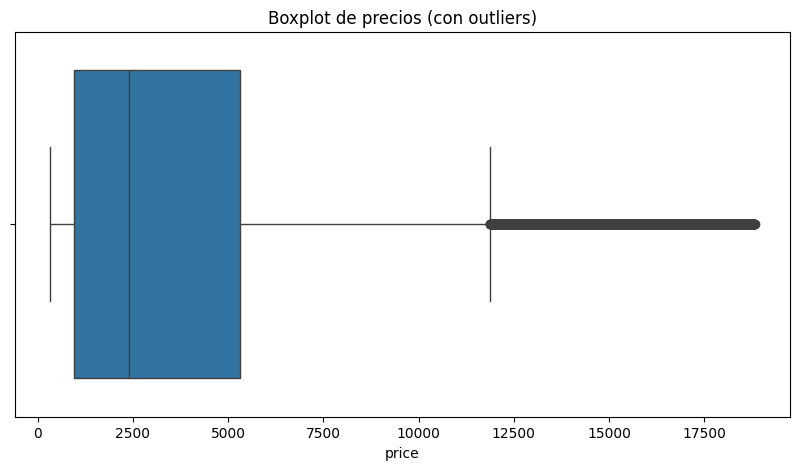

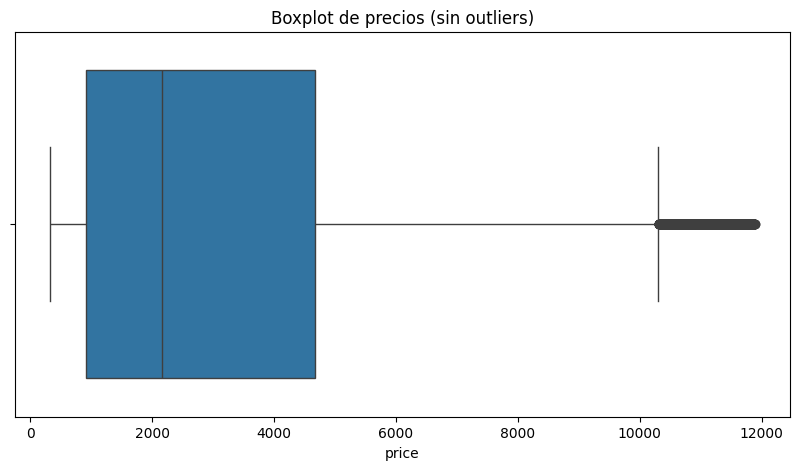


Asimetría y curtosis de la columna 'price':
Asimetría (skew): 1.6182250378540057
Curtosis: 2.17836501665563


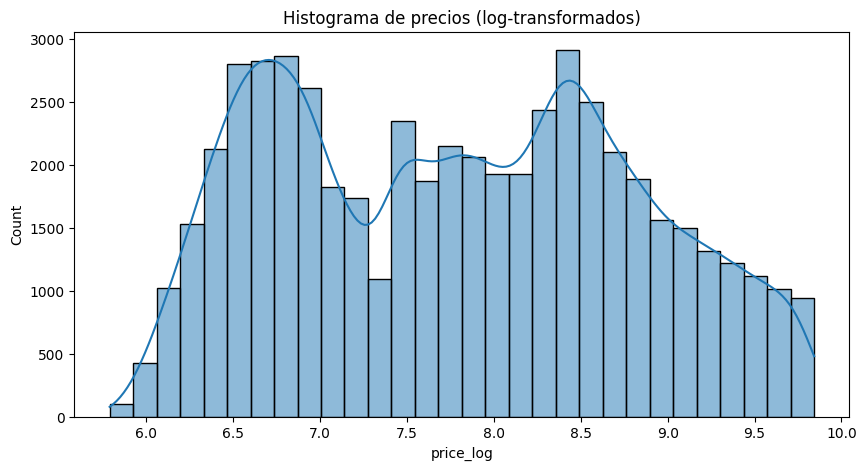

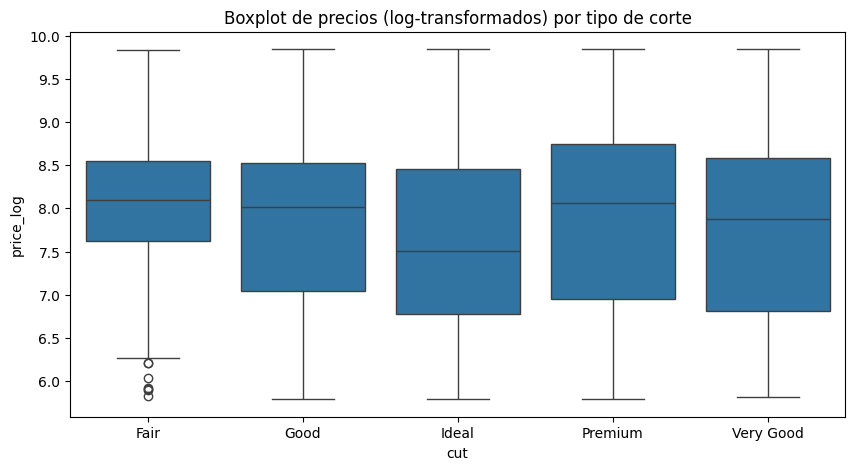

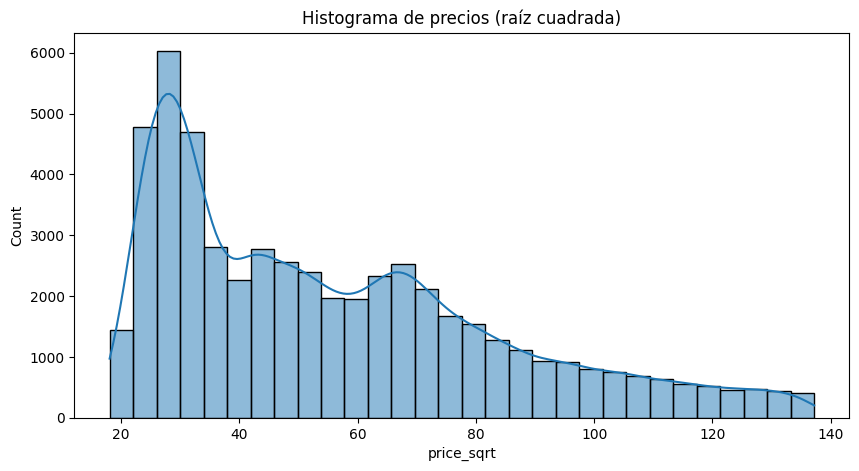

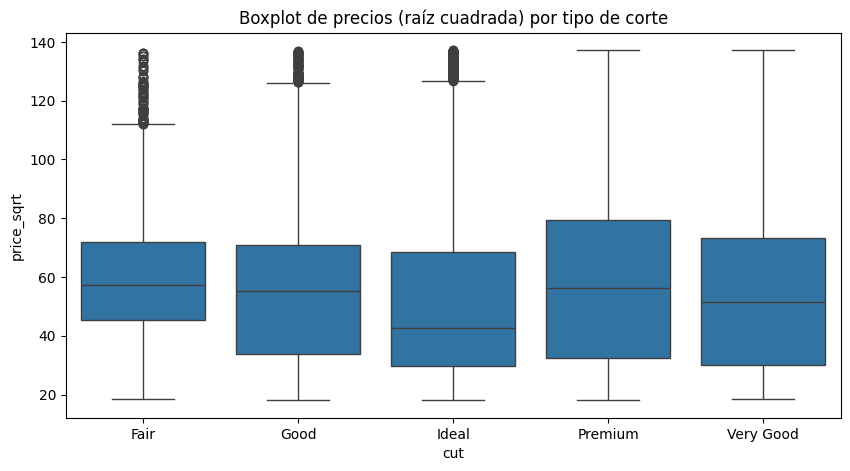


Categorías de precios:
   price price_category
0  326.0         Barato
1  326.0         Barato
2  327.0         Barato
3  334.0         Barato
4  335.0         Barato
price_category
Medio     24648
Caro      14676
Barato    14470
Name: count, dtype: int64


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

print("\nLímites de Tukey para la columna 'price':")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límite inferior: {lower_limit}, Límite superior: {upper_limit}")
print(f"Número de filas sin outliers: {len(df_no_outliers)}")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot de precios (con outliers)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_no_outliers['price'])
plt.title('Boxplot de precios (sin outliers)')
plt.show()

price_skew = skew(df['price'])
price_kurt = kurtosis(df['price'])

print("\nAsimetría y curtosis de la columna 'price':")
print(f"Asimetría (skew): {price_skew}")
print(f"Curtosis: {price_kurt}")

df['price_log'] = np.log1p(df['price'])  
df['price_sqrt'] = np.sqrt(df['price'])  

plt.figure(figsize=(10, 5))
sns.histplot(df['price_log'], kde=True, bins=30)
plt.title('Histograma de precios (log-transformados)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='cut', y='price_log', data=df)
plt.title('Boxplot de precios (log-transformados) por tipo de corte')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['price_sqrt'], kde=True, bins=30)
plt.title('Histograma de precios (raíz cuadrada)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='cut', y='price_sqrt', data=df)
plt.title('Boxplot de precios (raíz cuadrada) por tipo de corte')
plt.show()

price_bins = [df['price'].min(), 1000, 5000, df['price'].max()]
price_labels = ['Barato', 'Medio', 'Caro']

df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

print("\nCategorías de precios:")
print(df[['price', 'price_category']].head())
print(df['price_category'].value_counts())

## Parte 4. Visualizaciones.

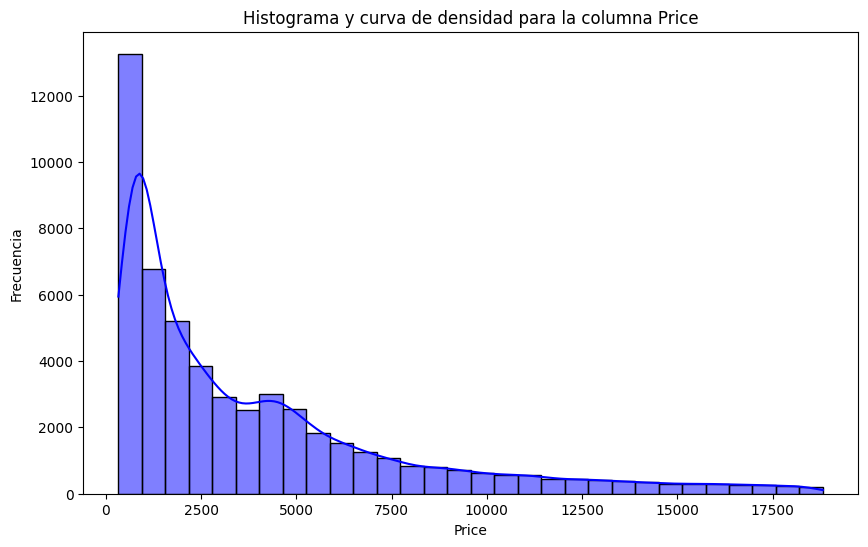

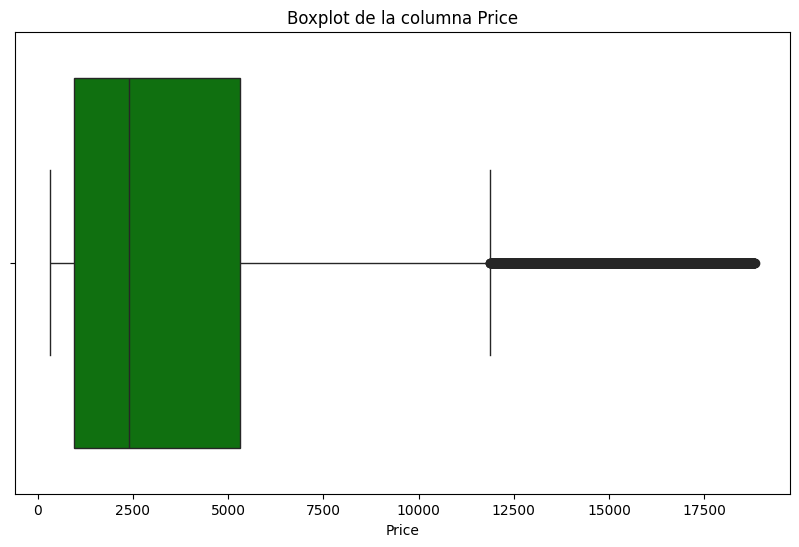

/var/folders/3x/rhmlhy0j0sgfl6wq44x2r1pm0000gn/T/ipykernel_2724/1156573626.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['cut'], order=df['cut'].value_counts().index, palette='pastel')


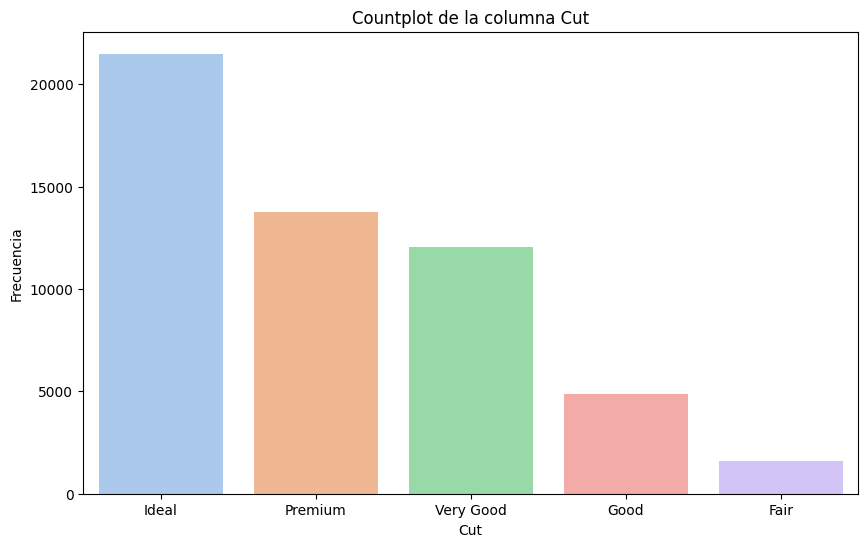

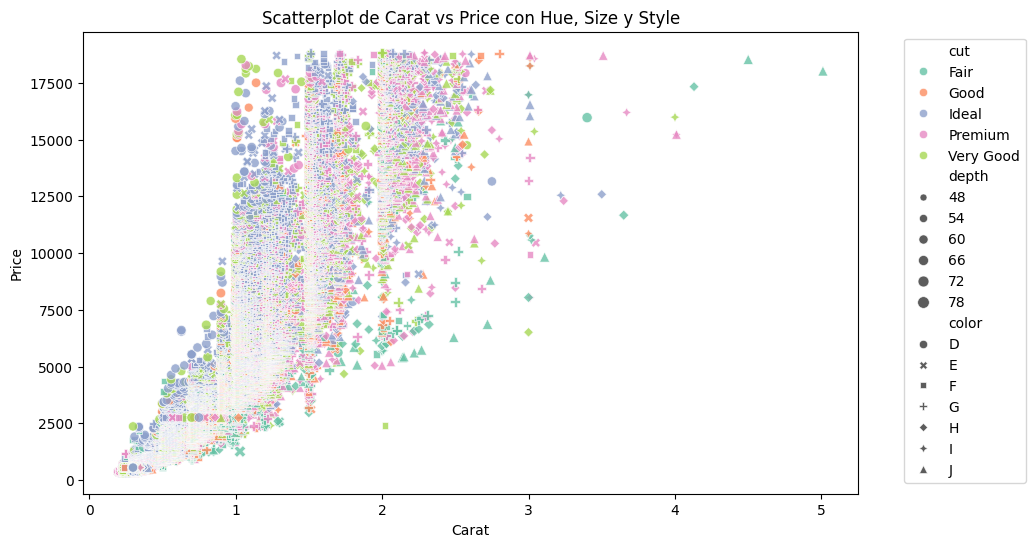

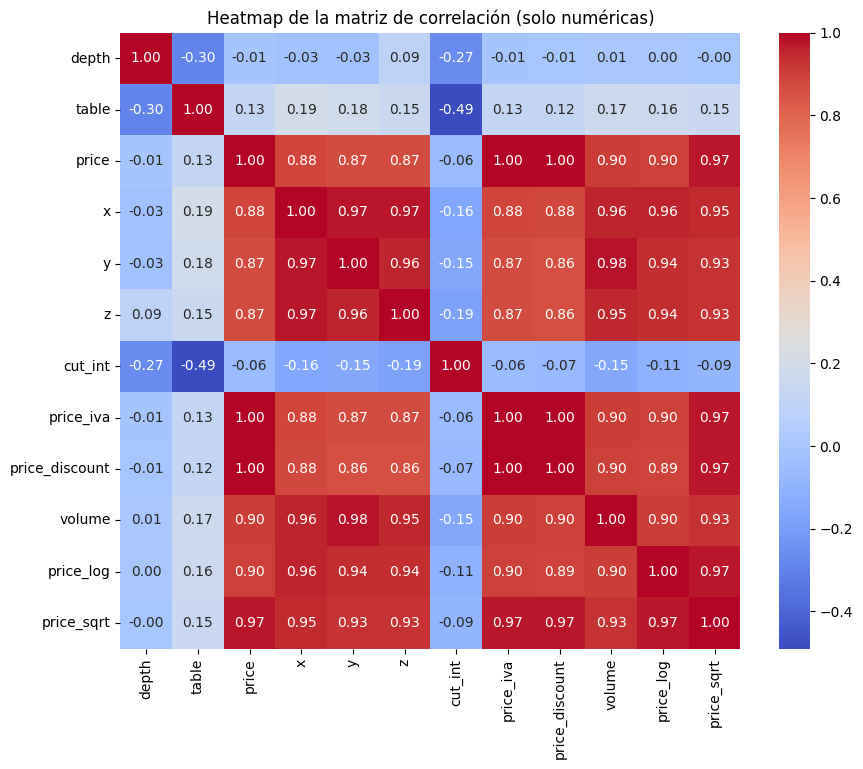

/var/folders/3x/rhmlhy0j0sgfl6wq44x2r1pm0000gn/T/ipykernel_2724/1156573626.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_correlation.index, y=price_correlation.values, palette='Blues_r')


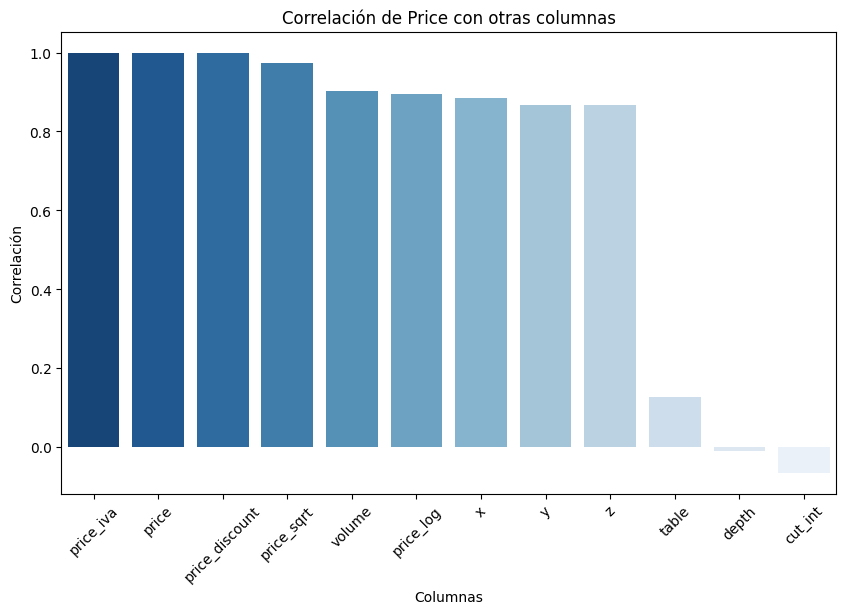

/var/folders/3x/rhmlhy0j0sgfl6wq44x2r1pm0000gn/T/ipykernel_2724/1156573626.py:55: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, values='price', index='cut', columns='color', aggfunc='mean')


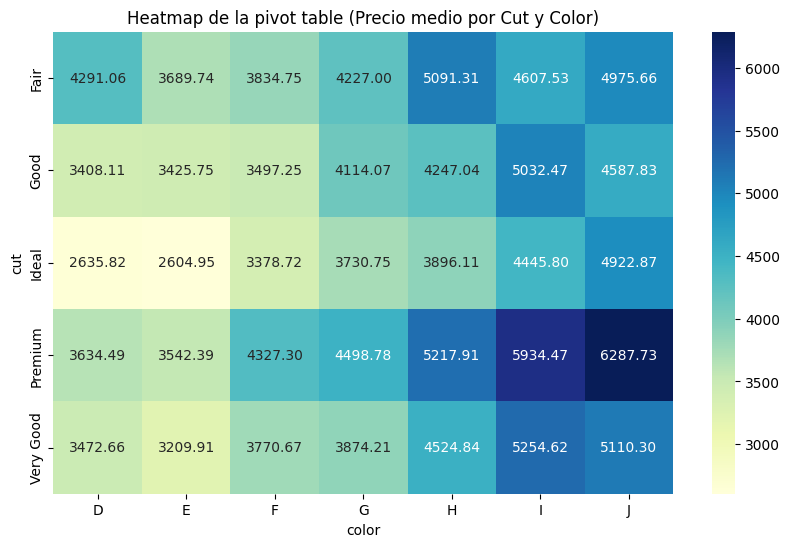

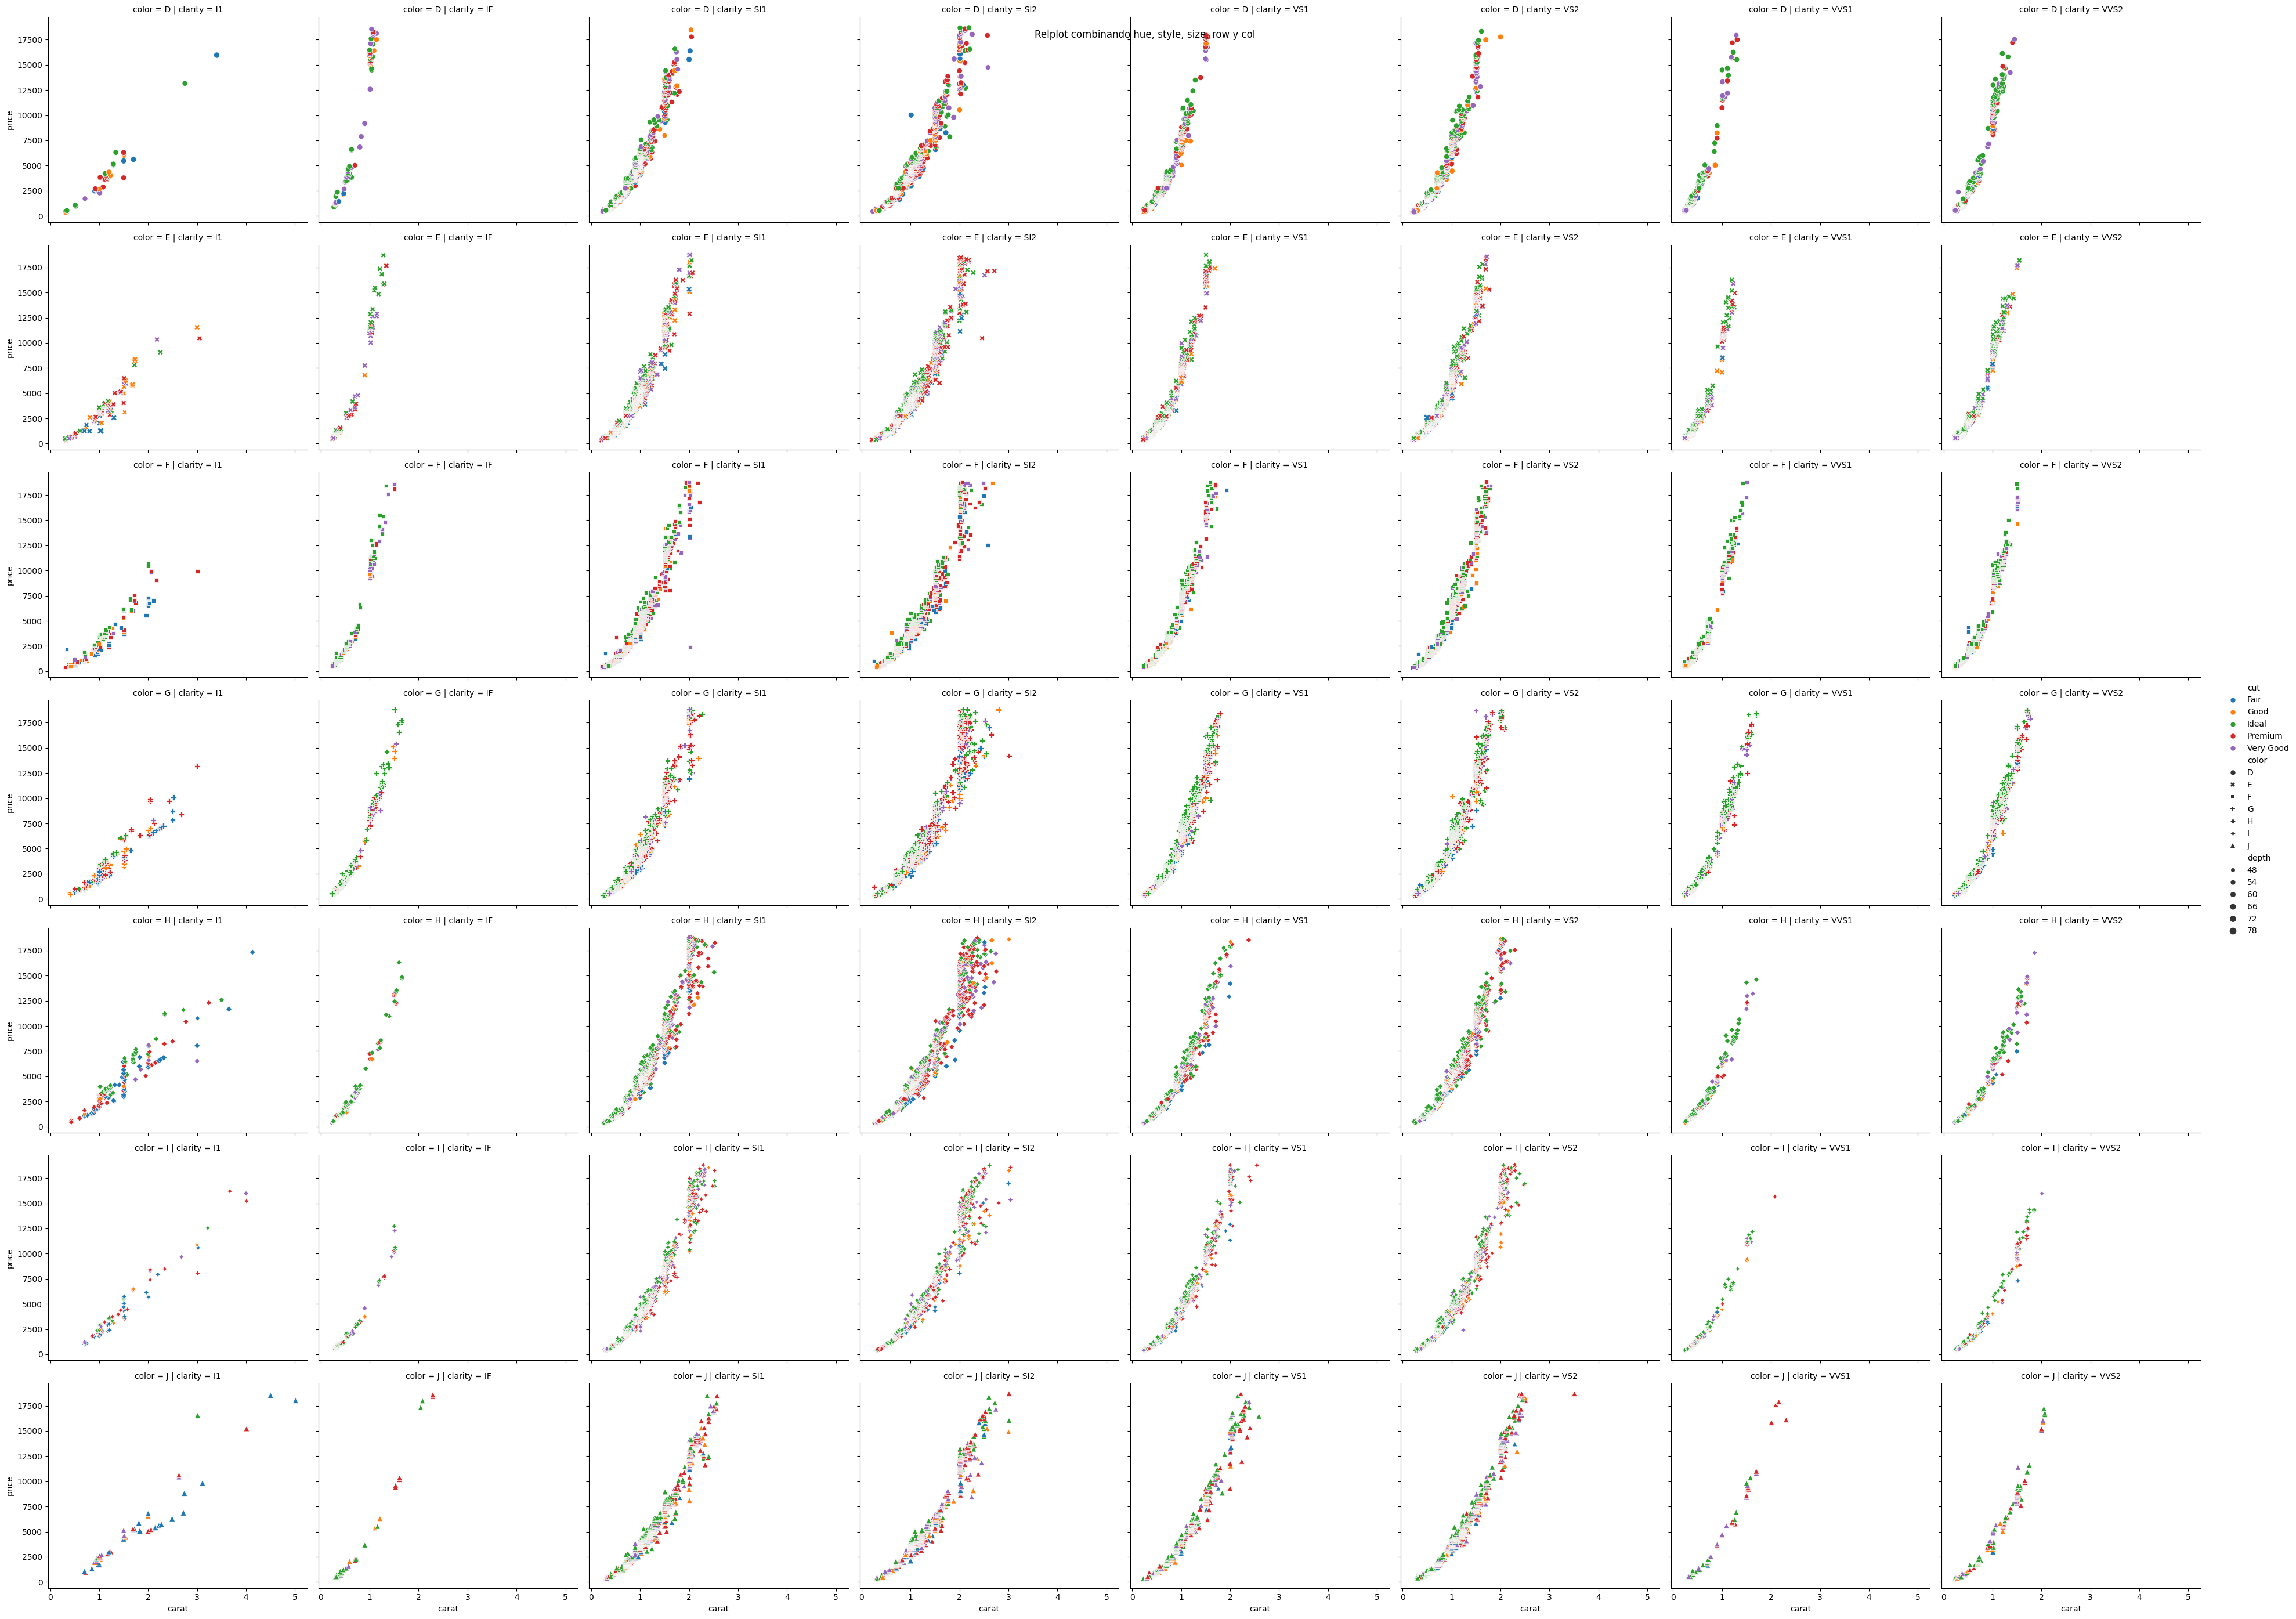

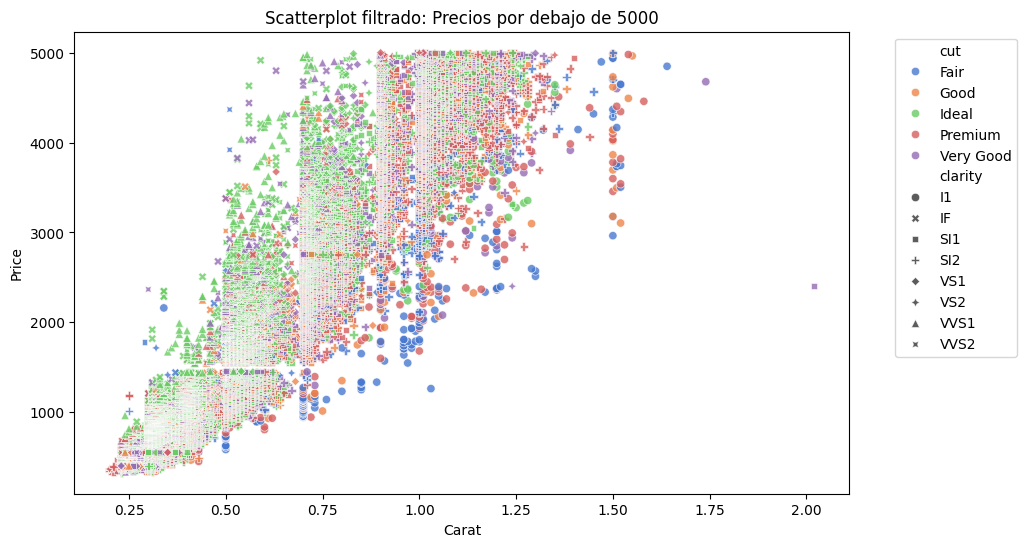

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Histograma y curva de densidad para la columna Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='green')
plt.title('Boxplot de la columna Price')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['cut'], order=df['cut'].value_counts().index, palette='pastel')
plt.title('Countplot de la columna Cut')
plt.xlabel('Cut')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut', size='depth', style='color', palette='Set2', alpha=0.8)
plt.title('Scatterplot de Carat vs Price con Hue, Size y Style')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap de la matriz de correlación (solo numéricas)')
plt.show()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.index, y=price_correlation.values, palette='Blues_r')
plt.title('Correlación de Price con otras columnas')
plt.xlabel('Columnas')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.show()

pivot_table = pd.pivot_table(df, values='price', index='cut', columns='color', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Heatmap de la pivot table (Precio medio por Cut y Color)')
plt.show()

relplot = sns.relplot(
    data=df,
    x='carat', 
    y='price', 
    hue='cut', 
    style='color', 
    size='depth', 
    col='clarity', 
    row='color', 
    kind='scatter',
    height=4, 
    aspect=1.2
)
relplot.fig.suptitle('Relplot combinando hue, style, size, row y col')
plt.show()

filtered_df = df[df['price'] <= 5000]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='carat', y='price', hue='cut', style='clarity', palette='muted', alpha=0.8)
plt.title('Scatterplot filtrado: Precios por debajo de 5000')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()